<h1>DBSCAN</h1>

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN as skl_dbs
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_moons, make_blobs
import matplotlib.pyplot as plt


from IPython.display import HTML
plt.style.use('ggplot')
%matplotlib inline

<p>Here implemented kind of algorithm, described in preudocode on <a href='https://ru.wikipedia.org/wiki/DBSCAN'>Wikipedia DBSCAN</a></p>

In [2]:
class DBSCAN:
    def __init__(self, minPts, eps):
        self.minPts = minPts
        self.eps = eps
        self.x = None
        self.clusters = {}
        self.clusters[-1] = []
        
    def _find_neighbors(self, point):
        if self.x is None:
            raise ValueError('Database is None')
        distances = self._euclidean_distance(point, self.x)
        
        slice_idx = np.where((distances <= self.eps))[0]
        return self.x[slice_idx]
    
    def _is_checked(self, point):
        for cluster in self.clusters.keys():
            if point in self.clusters[cluster]:
                return True
        return False
    
    @staticmethod
    def _euclidean_distance(x, y):
        if len(x.shape) == len(y.shape) == 1:
            axis = None
        else:
            axis = 1
        return np.sqrt(np.sum((x - y)**2, axis=axis))

    def fit(self, x):
        self.x = x
        c = 0
        for point in self.x:
            if self._is_checked(point.tolist()):
                continue
            neighbors = self._find_neighbors(point)
            
            if len(neighbors) < self.minPts:
                self.clusters[-1].append(point.tolist())
                continue
                
            self.clusters[c] = []
            self.clusters[c].append(point.tolist())
            
            while len(neighbors) != 0:
                neighbor = neighbors[0]  # take the first neighbor
                neighbors = neighbors[1:]  # delete first neighbor from the neighbors

                if neighbor.tolist() in self.clusters[-1]:
                    self.clusters[-1].remove(neighbor.tolist())
                if self._is_checked(neighbor.tolist()):
                    continue
                    
                self.clusters[c].append(neighbor.tolist())
                
                new_neighbors = self._find_neighbors(neighbor)
                if len(new_neighbors) >= self.minPts:
                    neighbors = np.concatenate([neighbors, new_neighbors])
            c += 1
            
    def predict(self, x):
        labels = []
        for point in x:
            for cluster in self.clusters.keys():
                if point.tolist() in self.clusters[cluster]:
                    labels.append(cluster)
        return np.array(labels)

In [3]:
def plot_dataset(x):
    plt.figure(figsize=(12, 8))
    plt.scatter(x[:, 0], x[:, 1])
    plt.show()


def plot_dbscan_preds(model):
    plt.figure(figsize=(12, 8))
    for cluster in model.clusters:
        subset = np.array(model.clusters[cluster])
        if len(subset) == 0:
            continue
        plt.scatter(subset[:, 0], subset[:, 1])
        

def plot_skl_dbscan(preds, x):
    plt.figure(figsize=(12, 8))
    for cluster in np.unique(preds):
        subset = x[preds == cluster]
        if len(subset) == 0:
            continue
        plt.scatter(subset[:, 0], subset[:, 1])

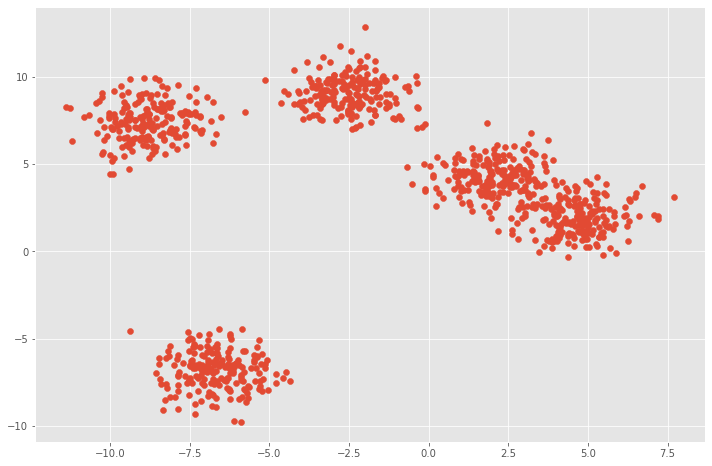

In [4]:
x, y = make_blobs(1000, random_state=42, centers=5)

plot_dataset(x)

In [5]:
minPts = 3
eps = 0.4

dbscan = DBSCAN(eps=eps, minPts=minPts)
dbscan.fit(x)

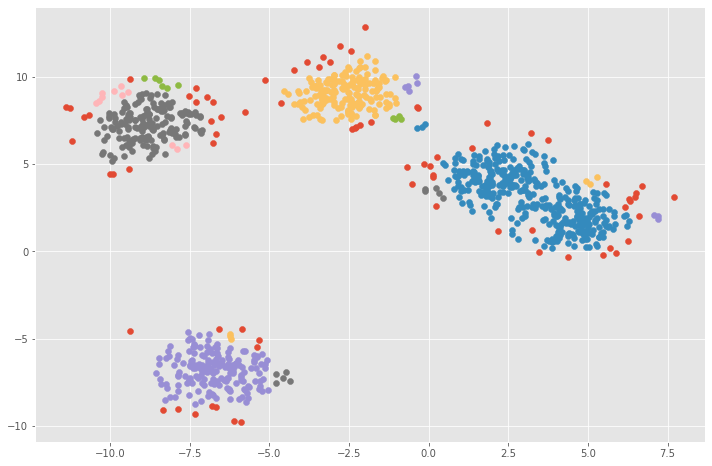

In [6]:
plot_dbscan_preds(dbscan)

In [7]:
skl = skl_dbs(eps=eps, min_samples=minPts)
skl.fit(x)

DBSCAN(eps=0.4, min_samples=3)

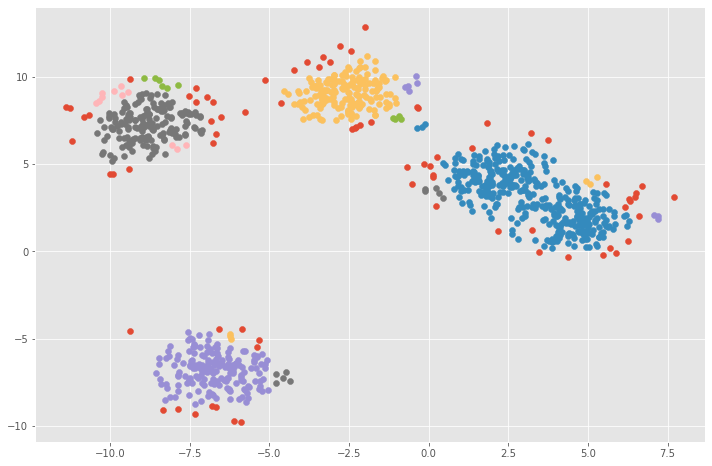

In [8]:
plot_skl_dbscan(skl.labels_, x)

In [9]:
(skl.labels_ == dbscan.predict(x)).all() == True

True

<p>Moons</p>

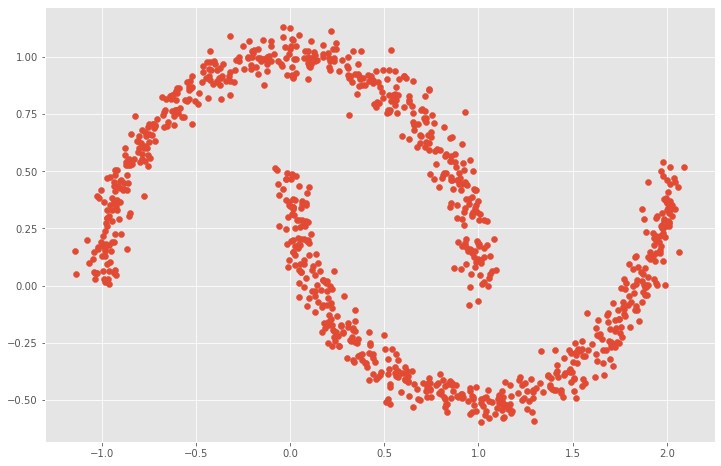

In [10]:
x, y = make_moons(1000, noise=0.05)

plot_dataset(x)

In [11]:
minPts = 3
eps = 0.06

dbscan = DBSCAN(eps=eps, minPts=minPts)
dbscan.fit(x)

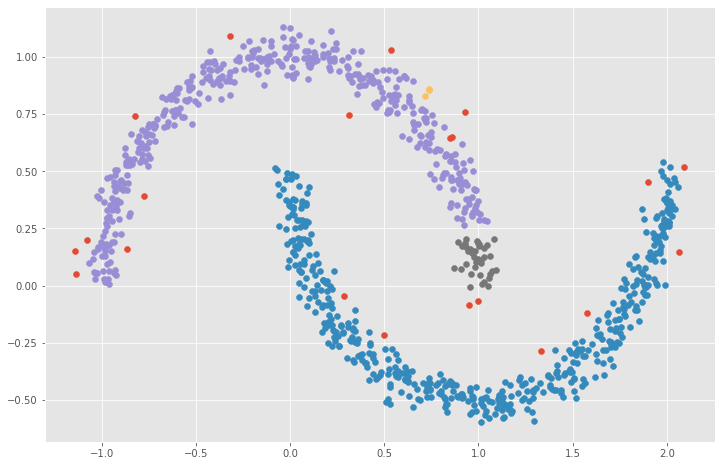

In [12]:
plot_dbscan_preds(dbscan)

In [13]:
skl = skl_dbs(eps=eps, min_samples=minPts)
skl.fit(x)

DBSCAN(eps=0.06, min_samples=3)

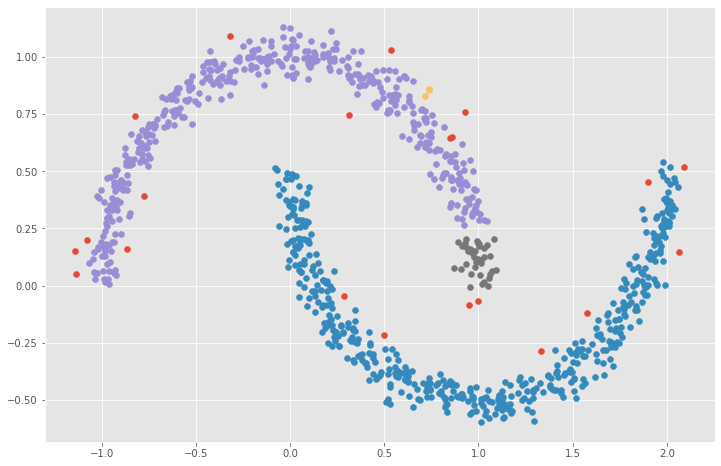

In [14]:
plot_skl_dbscan(skl.labels_, x)

<p>Find optimal eps</p>

In [15]:
def plot_optimal_eps_for_n(n_neighbors, x):
    nearest_neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    nearest_neighbors.fit(x)
    
    distances, idx = nearest_neighbors.kneighbors(x)
    
    distances = sorted(distances[:, -1])
    plt.figure(figsize=(12, 8))
    plt.plot(distances)
    plt.xlabel('n_points')
    plt.ylabel('eps')
    plt.show()

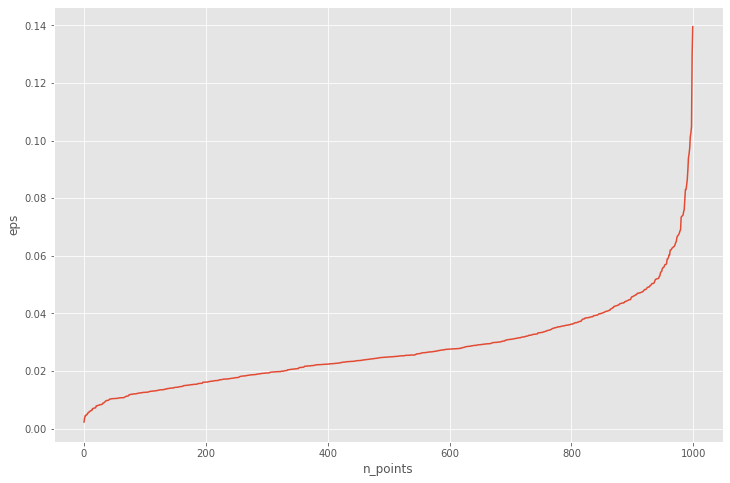

In [16]:
plot_optimal_eps_for_n(3, x)

In [17]:
with open('./style.css', 'r') as f:
    style = f.read()
HTML(style)